<a href="https://colab.research.google.com/github/Bhaskar-maity/Deep-Learning-Notebooks/blob/master/CIFAR10_small_images_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CIFAR10 small images classification



**importing libraries**

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

**Downloading data**

In [8]:
(xtrain,ytrain),(xtest,ytest) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [10]:
xtrain.shape

(50000, 32, 32, 3)

In [14]:
xtrain[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [17]:
ytrain

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
ytrain.shape

(50000, 1)



> Classes of image


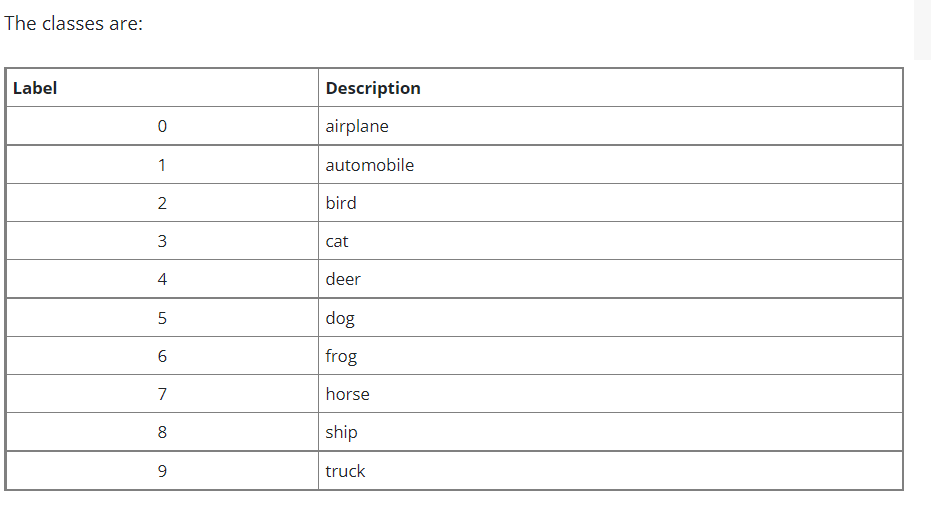

In [12]:
ytrain[1] # 9=truck in dataset class

array([9], dtype=uint8)

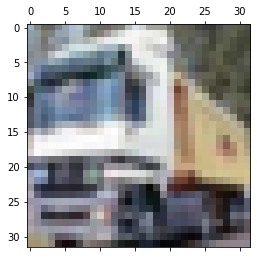

In [13]:
plt.matshow(xtrain[1])

In [16]:
ytrain[6] # 2=bird in dataset class

array([2], dtype=uint8)

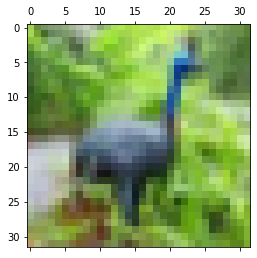

In [15]:
plt.matshow(xtrain[6]) #bird in dataset class

**Scale images**

In [18]:
xtrain_scaled = xtrain/255
xtest_scaled = xtest/255

**Turning into categorical y data**

In [20]:
ytrain_categorical = keras.utils.to_categorical(
    ytrain, num_classes=10, dtype='float32'
)
ytest_categorical = keras.utils.to_categorical(
    ytest, num_classes=10, dtype='float32'
)

In [21]:
ytrain

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [22]:
ytrain_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
ytrain_categorical.shape

(50000, 10)

 **Model building and training**

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    # 2 hidden layers
    keras.layers.Dense(2500, activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(xtrain_scaled,ytrain_categorical, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 116s 73ms/step - loss: 1.8127 - accuracy: 0.3527
Epoch 2/2
1563/1563 [==============================] - 115s 74ms/step - loss: 1.6266 - accuracy: 0.4269


In [29]:
xtest_flatten = xtest.reshape(-1,32*32*3)
xtest_flatten

array([[158, 112,  49, ...,  21,  67, 110],
       [235, 235, 235, ..., 186, 200, 199],
       [158, 190, 222, ...,   7,   8,   7],
       ...,
       [ 20,  15,  12, ...,  25,  20,  47],
       [ 25,  40,  12, ...,  92, 120,  80],
       [ 73,  78,  75, ...,  27,  26,  26]], dtype=uint8)

In [33]:
model.evaluate(xtest,ytest_categorical)

313/313 [==============================] - 8s 26ms/step - loss: 171.0653 - accuracy: 0.4300


[171.06533813476562, 0.4300000071525574]

In [38]:
ytest_predict = model.predict(xtest)
ytest_predict.shape

(10000, 10)

In [39]:
ytest_predict[0]

array([2.8162644e-31, 1.9924760e-02, 1.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00], dtype=float32)

In [44]:
ytest[:3]

array([[3],
       [8],
       [8]], dtype=uint8)

In [43]:

ytest_predict_lables = [np.argmax(i) for i in ytest_predict ]
ytest_predict_lables[:3]

[2, 0, 0]

**Confusion Matrix**

In [45]:

confiusion_matrix = tf.math.confusion_matrix(labels=ytest,predictions=ytest_predict_lables)
confiusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[907,  30,  41,  21,   1,   0,   0,   0,   0,   0],
       [547, 391,  42,  20,   0,   0,   0,   0,   0,   0],
       [470,  58, 435,  36,   1,   0,   0,   0,   0,   0],
       [296, 143, 381, 179,   0,   1,   0,   0,   0,   0],
       [357,  65, 527,  49,   1,   1,   0,   0,   0,   0],
       [283,  93, 466, 158,   0,   0,   0,   0,   0,   0],
       [146, 101, 588, 161,   3,   0,   1,   0,   0,   0],
       [442,  70, 305, 155,   8,   2,   2,  16,   0,   0],
       [869,  70,  25,  36,   0,   0,   0,   0,   0,   0],
       [513, 387,  30,  63,   0,   1,   1,   4,   1,   0]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

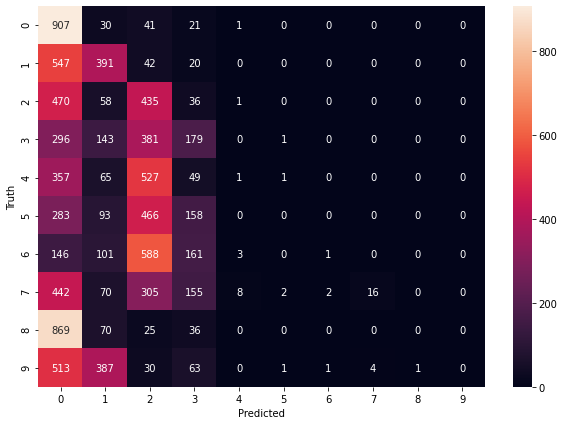

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confiusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')